In [1]:
def process_string(value):
    map_dict = {
    'maxda': 'mazda', 
    "toyouta":  "toyota",
    "vokswagen":  "vw",
    "volkswagen": "vw",
    }
    result = value.lower().strip().split(" ")
    name = result[0]
    if name in map_dict.keys():
        name =map_dict[name]
    return name


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def get_data(value):
    return sns.load_dataset(value)
mpg = get_data("mpg")

In [4]:
mpg.shape

(398, 9)

In [5]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
num_features = ["displacement", "horsepower", "weight", "acceleration"]
nominal_cat_features = ["origin"]
ordinal_cat_features = ["cylinders"]
custom_transform_features = ["name"]
skip_features = ["model_year"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x = mpg.drop("mpg", axis = 1)
y = mpg["mpg"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=45)
# taking 90% data set for training and 10% for test

### without random state or split or suffle 
    1 2 3 4 5 6 7 8 9 10
    first run train 1, 4, 8, 9, 10, 5  test 2, 3, 6, 7, accuracy -90%
    second run train 1, 2, 3, 5, 7, 9  test 4, 6, 8, 10 accuracy -80%
### with random state or split or suffle
    1 2 3 4 5 6 7 8 9 10
    first run train 1, 2, 4, 6, 8, 10 test 3, 5, 6, 9 accuracy -85%
    second run train 1, 2, 4, 6, 8, 10 test 3, 5, 6, 9 accuracy -85%
    


                        Train sample --> train_data --> x_train.csv and y_train.csv
 
        population 
        
                        test sample --> test_data --> x_test.csv and test.csv

In [9]:
x_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
178,4,120.0,88.0,2957,17.0,75,europe,peugeot 504
299,4,141.0,71.0,3190,24.8,79,europe,peugeot 504
360,6,145.0,76.0,3160,19.6,81,europe,volvo diesel
313,4,151.0,90.0,2678,16.5,80,usa,chevrolet citation
52,4,88.0,76.0,2065,14.5,71,europe,fiat 124b


### Data transformation

    numerical features
        dealing with missing values
        dealing with outliers 
        new feature generation
        scaling 
        

        raw_data                 --> Transformation funciton  --> data 
        input data               -->       T()                --> output
        
       (having missing values)   -->    function(T1)          --> no missing values
       (data with outliers)      -->    function(T2)          --> no outliers in data 
       (data with N features)    -->    function(T3)          --> data with (N+-M) features
       (unscaled)                -->    function(T4)          --> scaled data
       (categorical data)        -->    function(T5)          --> numerical data 
       
       Data Pipelines(we use data pipelines for easy implementation of transformation)
       

                                            Data Pipeline
                         ----------------------------------------------------
                         
        input data ->       T1   -> T2  -> T3  -> T4   ->  T5                       ML model ready Data              
        
                         ----------------------------------------------------
        

# Missing values
    
            NA -> not available (in case of string data)
            NaN -> not a number (in case of numerical value)
        while gatgering data it is possible due to some reasons like sensor is faulty, somebody refuse 
        to give information, many rows contains missing values encoded as none, ull, NA, NaN 

In [10]:
temp = pd.DataFrame(np.random.randint(1, 20, (6, 5)), 
                   columns = ["A", "B", "C", "D", "E"])


In [11]:
temp.loc[[1, 3], 'A'] = np.nan
temp.loc[[2, 3], 'B'] = np.nan
temp.loc[[0, 4], 'C'] = np.nan
temp.loc[[5, 0], :] = np.nan
temp["E"] = np.nan

In [12]:
temp

,A,B,C,D,E
0,NaN,NaN,NaN,NaN,NaN
1,NaN,11.0,18.0,6.0,NaN
2,5.0,NaN,11.0,9.0,NaN
3,NaN,NaN,3.0,14.0,NaN
4,1.0,10.0,NaN,7.0,NaN
5,NaN,NaN,NaN,NaN,NaN


In [13]:
temp.drop("E", axis =1)
temp.drop([5, 0] , axis = 0)

,A,B,C,D,E
1,NaN,11.0,18.0,6.0,NaN
2,5.0,NaN,11.0,9.0,NaN
3,NaN,NaN,3.0,14.0,NaN
4,1.0,10.0,NaN,7.0,NaN


In [14]:
temp

,A,B,C,D,E
0,NaN,NaN,NaN,NaN,NaN
1,NaN,11.0,18.0,6.0,NaN
2,5.0,NaN,11.0,9.0,NaN
3,NaN,NaN,3.0,14.0,NaN
4,1.0,10.0,NaN,7.0,NaN
5,NaN,NaN,NaN,NaN,NaN


In [15]:
temp.dropna(axis = 1, how="all", inplace = True)  # default value of how is any  and default axis is 0

In [16]:
temp.dropna(axis = 0, how="all", inplace  = True)

In [17]:
temp

,A,B,C,D
1,NaN,11.0,18.0,6.0
2,5.0,NaN,11.0,9.0
3,NaN,NaN,3.0,14.0
4,1.0,10.0,NaN,7.0


In [18]:
temp = pd.DataFrame(np.random.randint(1, 20, (6, 4)), 
                   columns = ["A", "B", "C", "D"])
temp.loc[[1, 3], 'A'] = np.nan
temp.loc[[0, 3], 'C'] = np.nan

In [19]:
temp

,A,B,C,D
0,2.0,15,NaN,11
1,NaN,17,16.0,6
2,9.0,3,2.0,19
3,NaN,18,NaN,14
4,15.0,11,18.0,3
5,8.0,9,12.0,4


In [20]:
temp.dropna()

,A,B,C,D
2,9.0,3,2.0,19
4,15.0,11,18.0,3
5,8.0,9,12.0,4


In [21]:
temp.isna()

,A,B,C,D
0,False,False,True,False
1,True,False,False,False
2,False,False,False,False
3,True,False,True,False
4,False,False,False,False
5,False,False,False,False


In [22]:
temp.isna().sum()

A    2
B    0
C    2
D    0
dtype: int64

In [23]:
ro = temp.shape[0]
nr = temp.dropna().shape[0]
print(f"before {ro} rows after na removal {nr} rows available which {nr / ro * 100:.2f}%")

before 6 rows after na removal 3 rows available which 50.00%


### drop missing values
    1. Drop all missing values - only usuable if tiny portion of data is missing 
        column wise -> never advised(any, all)
        row wise    -> use wisely(any, all)
    
    2. Fill values with appropriate values
        replace missing values with centres (mean, median, mode)
        or can replace with random values in range (mean +- 3std, median +- 1.5IQR)
    3. we can create ML model to predict missing values                

In [24]:
temp

,A,B,C,D
0,2.0,15,NaN,11
1,NaN,17,16.0,6
2,9.0,3,2.0,19
3,NaN,18,NaN,14
4,15.0,11,18.0,3
5,8.0,9,12.0,4


In [25]:
new = temp.fillna(method = "ffill")

In [26]:
new

,A,B,C,D
0,2.0,15,NaN,11
1,2.0,17,16.0,6
2,9.0,3,2.0,19
3,9.0,18,2.0,14
4,15.0,11,18.0,3
5,8.0,9,12.0,4


In [27]:
new = temp.fillna(method="bfill")

In [28]:
new

,A,B,C,D
0,2.0,15,16.0,11
1,9.0,17,16.0,6
2,9.0,3,2.0,19
3,15.0,18,18.0,14
4,15.0,11,18.0,3
5,8.0,9,12.0,4


In [29]:
temp.mean()

A     8.500000
B    12.166667
C    12.000000
D     9.500000
dtype: float64

In [30]:
median_values=temp.median().to_dict()  # dict values can be used to convert values to dicionaries

In [31]:
median_values

{'A': 8.5, 'B': 13.0, 'C': 14.0, 'D': 8.5}

In [32]:
temp.fillna(value = median_values)  # this will fill the na vlaues with median values

,A,B,C,D
0,2.0,15,14.0,11
1,8.5,17,16.0,6
2,9.0,3,2.0,19
3,8.5,18,14.0,14
4,15.0,11,18.0,3
5,8.0,9,12.0,4


 ### This same median values must be feed into the test data set also 
      thus we have to keep these values stores 
      this would be very difficult so we use Trannsformers

# Transformers

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
temp

,A,B,C,D
0,2.0,15,NaN,11
1,NaN,17,16.0,6
2,9.0,3,2.0,19
3,NaN,18,NaN,14
4,15.0,11,18.0,3
5,8.0,9,12.0,4


In [35]:
imputer = SimpleImputer(strategy = "median")
imputer.fit(temp)  # training data 
# it will store median of each col 


SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([ 8.5, 13. , 14. ,  8.5])

In [37]:
temp_tr = imputer.transform(temp)  # this will give a array

In [38]:
temp_tr

array([[ 2. , 15. , 14. , 11. ],
       [ 8.5, 17. , 16. ,  6. ],
       [ 9. ,  3. ,  2. , 19. ],
       [ 8.5, 18. , 14. , 14. ],
       [15. , 11. , 18. ,  3. ],
       [ 8. ,  9. , 12. ,  4. ]])

In [39]:
temp_tr = pd.DataFrame(temp_tr, columns=temp.columns)

In [40]:
temp_tr

,A,B,C,D
0,2.0,15.0,14.0,11.0
1,8.5,17.0,16.0,6.0
2,9.0,3.0,2.0,19.0
3,8.5,18.0,14.0,14.0
4,15.0,11.0,18.0,3.0
5,8.0,9.0,12.0,4.0


In [41]:
from sklearn.impute import SimpleImputer

In [42]:
x_train_num = x_train[num_features]

In [43]:
imputer = SimpleImputer(strategy = "median")

In [44]:
x_train_num_tr = imputer.fit_transform(x_train_num)

In [45]:
x_train_num_tr

array([[ 120. ,   88. , 2957. ,   17. ],
       [ 141. ,   71. , 3190. ,   24.8],
       [ 145. ,   76. , 3160. ,   19.6],
       ...,
       [  98. ,   94.5, 2046. ,   19. ],
       [ 120. ,   88. , 2160. ,   14.5],
       [  71. ,   65. , 1836. ,   21. ]])

In [46]:
x_train_num_tr= pd.DataFrame(x_train_num_tr, columns=x_train_num.columns)

In [47]:
x_train_num_tr.head()

,displacement,horsepower,weight,acceleration
0,120.0,88.0,2957.0,17.0
1,141.0,71.0,3190.0,24.8
2,145.0,76.0,3160.0,19.6
3,151.0,90.0,2678.0,16.5
4,88.0,76.0,2065.0,14.5


In [48]:
x_train_num_tr.isna().sum()

displacement    0
horsepower      0
weight          0
acceleration    0
dtype: int64

In [49]:
x_train_num.isna().sum()

displacement    0
horsepower      6
weight          0
acceleration    0
dtype: int64

### Transformers
    obj = Transformer()
    obj.fit(x_train) 
    # transform get statistics from training data which are used to transform data in furthur steps
    x_tarin_tr = obj.transform(x_train)
    x_test_tr = obj.fit(x_test)
    x_test_tr = obj.fit_transform(x_test) #  fit and transform at the same time
    

## write a function to remove outliers values with the following values:
    replace with median / mean values which does not follow below rules
    median / mean 
    mean - 3*std < X_i < mean+ #*std
    Q1-1 IQR < x_i < Q3+1.5 * IQR

In [50]:
temp = pd.DataFrame({
        "A": [10, 10, 20 , 30, 40, 50],
        "B": [500, 600, 900, 700, 800, 500]
        })

In [51]:
temp

,A,B
0,10,500
1,10,600
2,20,900
3,30,700
4,40,800
5,50,500


In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler_min_max = MinMaxScaler()
scaler_min_max.fit(temp)

MinMaxScaler()

In [54]:
scaler_min_max.data_max_

array([ 50., 900.])

In [55]:
scaler_min_max.data_min_

array([ 10., 500.])

In [56]:
scaler_min_max.data_range_

array([ 40., 400.])

In [57]:
temp_tr = scaler_min_max.transform(temp)

In [58]:
temp_tr

array([[0.  , 0.  ],
       [0.  , 0.25],
       [0.25, 1.  ],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 0.  ]])

In [59]:
temp

,A,B
0,10,500
1,10,600
2,20,900
3,30,700
4,40,800
5,50,500


In [60]:
pd.DataFrame(temp_tr, columns= temp.columns)  # conersion of array into data frame

,A,B
0,0.00,0.00
1,0.00,0.25
2,0.25,1.00
3,0.50,0.50
4,0.75,0.75
5,1.00,0.00


In [61]:
x_train_num.head()

,displacement,horsepower,weight,acceleration
178,120.0,88.0,2957,17.0
299,141.0,71.0,3190,24.8
360,145.0,76.0,3160,19.6
313,151.0,90.0,2678,16.5
52,88.0,76.0,2065,14.5


In [62]:
scaler = MinMaxScaler()

In [63]:
x_train_tr = scaler.fit_transform(x_train_num)

In [64]:
x_train_tr

array([[0.13436693, 0.22826087, 0.38106039, 0.53571429],
       [0.18863049, 0.13586957, 0.4471222 , 1.        ],
       [0.19896641, 0.16304348, 0.43861639, 0.69047619],
       ...,
       [0.07751938,        nan, 0.12276722, 0.6547619 ],
       [0.13436693, 0.22826087, 0.15508931, 0.38690476],
       [0.00775194, 0.10326087, 0.06322654, 0.77380952]])

In [65]:
pd.DataFrame(x_train_tr, columns = x_train_num.columns)

,displacement,horsepower,weight,acceleration
0,0.134367,0.228261,0.381060,0.535714
1,0.188630,0.135870,0.447122,1.000000
2,0.198966,0.163043,0.438616,0.690476
3,0.214470,0.239130,0.301956,0.505952
4,0.051680,0.163043,0.128154,0.386905
...,...,...,...,...
353,0.728682,0.538043,0.692373,0.238095
354,1.000000,0.972826,0.946413,0.178571
355,0.077519,NaN,0.122767,0.654762
356,0.134367,0.228261,0.155089,0.386905


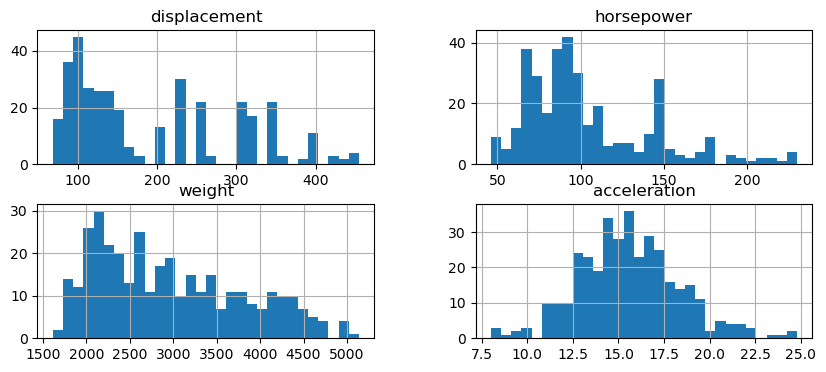

In [66]:
x_train_num.hist(bins=30, figsize=(10, 4))
plt.show()

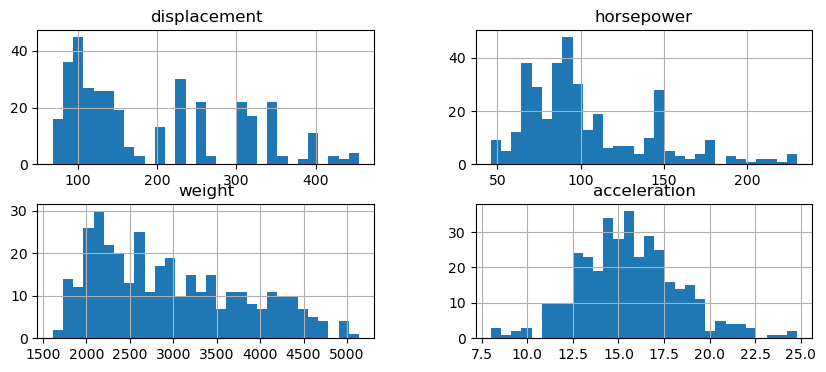

In [67]:
x_train_num_tr.hist(bins=30, figsize=(10, 4))
plt.show()

## hence,distribution remains same

## issue in minmax scaling 
    if your data contains outliers than the min max scaling will not work properly
    so we use standard normal deviation

In [68]:
temp

,A,B
0,10,500
1,10,600
2,20,900
3,30,700
4,40,800
5,50,500


In [69]:
temp.mean()

A     26.666667
B    666.666667
dtype: float64

In [70]:
temp['A'] - temp["A"].mean()

0   -16.666667
1   -16.666667
2    -6.666667
3     3.333333
4    13.333333
5    23.333333
Name: A, dtype: float64

In [71]:
(temp['A'] - temp["A"].mean()) / temp["A"].std()

0   -1.020621
1   -1.020621
2   -0.408248
3    0.204124
4    0.816497
5    1.428869
Name: A, dtype: float64

In [72]:
temp["B"] -temp["B"].mean()

0   -166.666667
1    -66.666667
2    233.333333
3     33.333333
4    133.333333
5   -166.666667
Name: B, dtype: float64

In [73]:
(temp["B"] - temp["B"].mean()) / temp["B"].std()

0   -1.020621
1   -0.408248
2    1.428869
3    0.204124
4    0.816497
5   -1.020621
Name: B, dtype: float64

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()
temp_tr = scaler.fit_transform(temp)
temp_tr = pd.DataFrame(temp_tr, columns=["A", "B"])

In [76]:
temp_tr

,A,B
0,-1.118034,-1.118034
1,-1.118034,-0.447214
2,-0.447214,1.565248
3,0.223607,0.223607
4,0.894427,0.894427
5,1.565248,-1.118034


In [77]:
x_train_num

,displacement,horsepower,weight,acceleration
178,120.0,88.0,2957,17.0
299,141.0,71.0,3190,24.8
360,145.0,76.0,3160,19.6
313,151.0,90.0,2678,16.5
52,88.0,76.0,2065,14.5
...,...,...,...,...
213,350.0,145.0,4055,12.0
95,455.0,225.0,4951,11.0
32,98.0,NaN,2046,19.0
380,120.0,88.0,2160,14.5


In [78]:
imputer = SimpleImputer(strategy="median")  # consider this as tansformer 1
scaler = StandardScaler()  # T2 

In [79]:
x_train_tr = imputer.fit_transform(x_train_num) # T1 -> missing values treated
x_train_tr = scaler.fit_transform(x_train_tr)  # T2 -> scaled values
pd.DataFrame(x_train_tr, columns = x_train_num.columns)

,displacement,horsepower,weight,acceleration
0,-0.698363,-0.420718,-0.009257,0.512188
1,-0.495700,-0.869847,0.266903,3.328719
2,-0.457097,-0.737751,0.231346,1.451032
3,-0.399193,-0.367879,-0.339937,0.331641
4,-1.007182,-0.737751,-1.066484,-0.390546
...,...,...,...,...
353,1.521280,1.085188,1.292129,-1.293280
354,2.534595,3.198739,2.354098,-1.654374
355,-0.910676,-0.248992,-1.089004,1.234375
356,-0.698363,-0.420718,-0.953887,-0.390546


In [80]:
x_train_num_tr.isna().sum()

displacement    0
horsepower      0
weight          0
acceleration    0
dtype: int64

In [85]:
x_test_num = x_test[num_features]

In [88]:
x_test_num_tr = imputer.transform(x_test_num)
x_test_num_tr = scaler.transform(x_test_num_tr)

In [89]:
pd.DataFrame(x_test_num_tr, columns=x_test_num.columns)

,displacement,horsepower,weight,acceleration
0,-0.505350,-0.420718,-0.290157,-0.065562
1,-0.920327,-0.975525,-1.066484,0.801063
2,0.556218,-0.156524,0.663956,1.234375
3,-0.814170,-0.896267,-0.853143,0.476079
4,-0.843122,-0.764170,-0.870921,-0.390546
5,2.003811,1.666414,2.300762,-1.112733
6,-0.920327,-1.530332,-1.202786,1.956563
7,0.372856,1.613576,0.569137,-0.787749
8,-0.679061,-0.473557,-0.875662,0.331641
9,1.521280,0.028412,0.901002,1.234375


In [92]:
from sklearn.pipeline import Pipeline  

In [97]:
# process of pipelining
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), 
    ("std scaler", StandardScaler())
])

In [98]:
x_train_num_tr = num_pipeline.fit_transform(x_train_num)
x_train_num_tr = pd.DataFrame(x_train_num_tr, columns = x_train_num.columns)

In [100]:
x_train_num.head()

,displacement,horsepower,weight,acceleration
178,120.0,88.0,2957,17.0
299,141.0,71.0,3190,24.8
360,145.0,76.0,3160,19.6
313,151.0,90.0,2678,16.5
52,88.0,76.0,2065,14.5


In [102]:
x_test_num_tr = num_pipeline.transform(x_test_num)
x_test_num_tr = pd.DataFrame(x_test_num_tr, columns = x_test_num.columns)

In [103]:
x_test_num_tr.head()

,displacement,horsepower,weight,acceleration
0,-0.505350,-0.420718,-0.290157,-0.065562
1,-0.920327,-0.975525,-1.066484,0.801063
2,0.556218,-0.156524,0.663956,1.234375
3,-0.814170,-0.896267,-0.853143,0.476079
4,-0.843122,-0.764170,-0.870921,-0.390546


## Transformation of categorical data

## (i)Transformation of ordinal data

In [114]:
temp = pd.DataFrame({
    "Review":["good", "avg", "best", "worst", "good"], 
    "Grade":["A", "B", "A", "C", "B"]
})

In [115]:
temp

,Review,Grade
0,good,A
1,avg,B
2,best,A
3,worst,C
4,good,B


In [116]:
from sklearn.preprocessing import OrdinalEncoder

In [121]:
ord_enc = OrdinalEncoder()
temp_tr=ord_enc.fit_transform(temp)
temp_tr = pd.DataFrame(temp_tr, columns = temp.columns )
temp_tr

,Review,Grade
0,2.0,0.0
1,0.0,1.0
2,1.0,0.0
3,3.0,2.0
4,2.0,1.0


In [120]:
ord_enc.categories_

[array(['avg', 'best', 'good', 'worst'], dtype=object),
 array(['A', 'B', 'C'], dtype=object)]

In [122]:
ordinal_cat_features

['cylinders']

In [124]:
x_train_ord_cat = x_train[ordinal_cat_features]

In [127]:
x_train_ord_cat.head()  # we can pass as its is

,cylinders
178,4
299,4
360,6
313,4
52,4


In [129]:
x_train_ord_cat["cylinders"].unique()
# if we use ordinal encoder then 3 -> 0, 4 -> 1, 6 -> 2, 8 -> 3

array([4, 6, 8, 3, 5], dtype=int64)

In [130]:
from sklearn.preprocessing import OrdinalEncoder

In [143]:
ord_enc = OrdinalEncoder()
x_train_ord_cat_tr = ord_enc.fit_transform(x_train_ord_cat)
x_train_ord_cat_tr = pd.DataFrame(x_train_ord_cat_tr, columns = x_train_ord_cat. columns)
x_train_ord_cat_tr.head()

,cylinders
0,1.0
1,1.0
2,3.0
3,1.0
4,1.0


In [141]:
x_test_ord_cat = x_test[ordinal_cat_features]
x_test_ord_cat_tr = ord_enc.transform(x_test_ord_cat)
x_test_ord_cat_tr = pd.DataFrame(x_train_ord_cat_tr, columns = x_train_ord_cat.columns)
x_test_ord_cat_tr.head()

,cylinders
0,1.0
1,1.0
2,3.0
3,1.0
4,1.0


##  Transformation of nominal categories

In [144]:
temp = pd.DataFrame({
    "Gender":["M", "F", "F", "M", "F", "M", "F", "M"], 
    "Country":["IND", "UK", "US", "IND", "IND", "US", "UK", "US"]
})

In [145]:
temp

,Gender,Country
0,M,IND
1,F,UK
2,F,US
3,M,IND
4,F,IND
5,M,US
6,F,UK
7,M,US


In [154]:
from sklearn.preprocessing import OneHotEncoder
one_hot_enc = OneHotEncoder()
temp_tr = one_hot_enc.fit_transform(temp).toarray()
one_hot_enc.categories_

[array(['F', 'M'], dtype=object), array(['IND', 'UK', 'US'], dtype=object)]

In [159]:
columns = []
for cat_ in one_hot_enc.categories_:
        columns.extend(cat_)
columns        

['F', 'M', 'IND', 'UK', 'US']

In [163]:
temp_tr=pd.DataFrame(temp_tr, columns = columns)
temp_tr

,F,M,IND,UK,US
0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0,1.0
6,1.0,0.0,0.0,1.0,0.0
7,0.0,1.0,0.0,0.0,1.0


In [177]:
nominal_cat_features  

['origin']

In [178]:
x_train_nominal_cat = x_train[nominal_cat_features]
x_test_nominal_cat = x_test[nominal_cat_features]

In [187]:
one_hot_enc = OneHotEncoder()
x_train_nominal_cat_tr = one_hot_enc.fit_transform(x_train_nominal_cat).toarray()

In [188]:
one_hot_enc.categories_

[array(['europe', 'japan', 'usa'], dtype=object)]

In [189]:
columns = []
for cat_ in one_hot_enc.categories_:
        columns.extend(cat_)
columns      

['europe', 'japan', 'usa']

In [193]:
x_train_nominal_cat_tr = pd.DataFrame(x_train_nominal_cat_tr, columns = columns)
x_test_nominal_cat_tr = pd.DataFrame(one_hot_enc.transform(x_test_nominal_cat).toarray(), columns = columns)

In [195]:
x_train_nominal_cat_tr.head()

,europe,japan,usa
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [196]:
x_test_nominal_cat_tr.head()

,europe,japan,usa
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [198]:
x_train_num_tr.head()

,displacement,horsepower,weight,acceleration
0,-0.698363,-0.420718,-0.009257,0.512188
1,-0.495700,-0.869847,0.266903,3.328719
2,-0.457097,-0.737751,0.231346,1.451032
3,-0.399193,-0.367879,-0.339937,0.331641
4,-1.007182,-0.737751,-1.066484,-0.390546


In [201]:
x_train_ord_cat_tr.head()

,cylinders
0,1.0
1,1.0
2,3.0
3,1.0
4,1.0


In [202]:
x_train_nominal_cat_tr.head()

,europe,japan,usa
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [206]:
x_train_tr = pd.concat([
    x_train_num_tr, 
    x_train_ord_cat_tr, 
    x_train_nominal_cat_tr], axis = 1)

In [207]:
x_train_tr.head()

,displacement,horsepower,weight,acceleration,cylinders,europe,japan,usa
0,-0.698363,-0.420718,-0.009257,0.512188,1.0,1.0,0.0,0.0
1,-0.495700,-0.869847,0.266903,3.328719,1.0,1.0,0.0,0.0
2,-0.457097,-0.737751,0.231346,1.451032,3.0,1.0,0.0,0.0
3,-0.399193,-0.367879,-0.339937,0.331641,1.0,0.0,0.0,1.0
4,-1.007182,-0.737751,-1.066484,-0.390546,1.0,1.0,0.0,0.0


In [219]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [214]:
model1 = LinearRegression()
model2 = LinearRegression()

In [215]:
model1.fit(x_train_num_tr, y_train)
model2.fit(x_train_tr, y_train)

LinearRegression()

In [222]:
acc1 = r2_score(y_train, model1.predict(x_train_num_tr))
acc2 = r2_score(y_train, model2.predict(x_train_tr))

In [224]:
print(f"only numerical accruracy: {acc1*100:0.2f}")
print(f"complete features accuracy: {acc2*100:0.2f}")

only numerical accruracy: 70.69
complete features accuracy: 72.29
